<a href="https://colab.research.google.com/github/nairsatish/4540/blob/master/Data_Science_Camp_Iris_and_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying Bigger Datasets (Iris & MNIST)**

### **Higher Dimensional Data**

So far, we've looked at problems that can be solved with ***one*** perceptron (like AND/OR), and problems that can be solved with ***two*** perceptrons with a simple MLP (like XOR).
<br></br>
Many datasets, however, have many more features than just $x_1$ and $x_2$.
<br>
Each of these features adds a ***dimension*** to the input. So far, we've been dealing with $2$-dimensional inputs ($x_1, x_2$), but depending on the problem, inputs can be any $n$-dimension ($x_1, x_2, x_3...x_n$).
<br></br>
For instance, what if you wanted to predict the value of a house based on its features?
<br>
There are dozens of features to choose from, such as the number of rooms, number of bathrooms, square footage, the age of the house, the average income of its location, etc.
<br></br>
To solve these problems, you will need larger MLPs that contain multiple hidden layers with multiple perceptrons.
<br>
The perceptrons that compose an MLP can also be referred to as ***neurons*** due to their functional similarity to biological neurons.
<br>
MLPs, consisting of multiple layers of these neurons, are a type of ***neural network***, a term you may be more familiar with.
<br></br>
Neural networks are capable of classifying data with many dimensions, finding patterns in data that is very difficult for humans to see.
<br></br>
The diagram below represents a neural network (multilayered perceptron) with $L$-layers where each layer $l$ ($1 \leq l \leq L$) contains $k_l$ neurons.

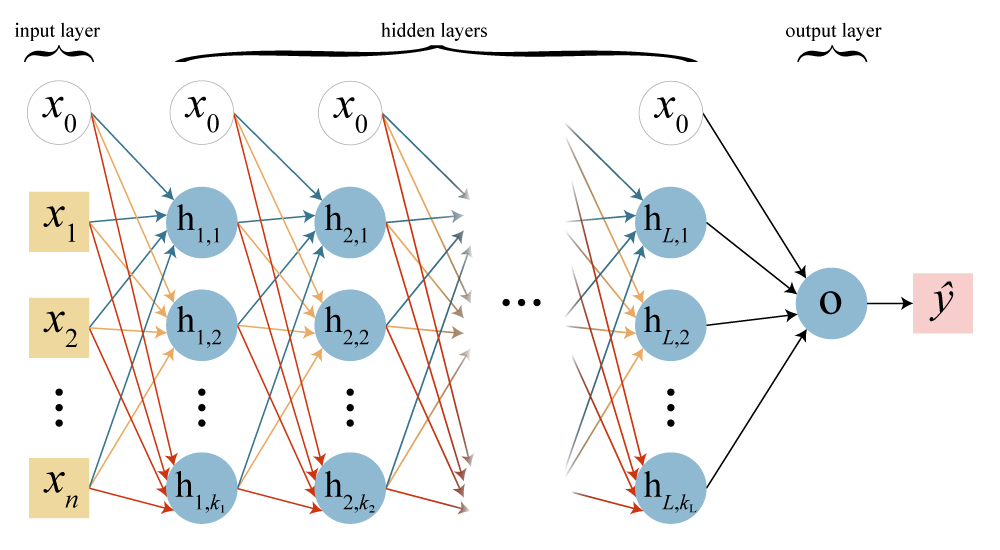

Though it may seem complex, this layout isn't much different than the two perceptron model we used to classify XOR.

1. Data ($x_1, x_2, x_3...x_n$) is passed from the input layer to the first hidden layer. Each neuron in the first hidden layer takes all data $x_1$→$x_n$ as input, meaning each neuron in the first layer has $n$-weights ($\theta_1, \theta_2, \theta_3...\theta_n$) and a bias $\theta_0$.
2. Each neuron uses its own weights to produce an output (weighted sum → $\sigma(z)$).
3. The outputs of the *first* hidden layer are then passed to the *second* hidden layer as inputs.
4. The second layer computes its outputs, passes them to the third layer, and so on.
5. Finally, the outputs of the final hidden layer are passed as inputs to the single neuron in the output layer.
6. The output layer computes its output $\hat{y}$, i.e. the output of the entire model.

Let's try and put a model like this to use to classify the Iris and MNIST datasets.

### **Iris Dataset - sklearn**

The Iris dataset is a dataset collected by Edgar Anderson in 1935 on four features (sepal length, sepal width, petal length, and petal width) of three species of Iris flowers (setosa, virginica, and versicolor).

The dataset consists of 50 samples per species, amounting to 150 samples total, each sample containing the values of the four features and their respective species classification.

Though there are three classes (setosa, virginica, and versicolor), we can change the problem into binary classification (two classes) by splitting the data into *setosa* ($0$) and *not setosa* ($1$).

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


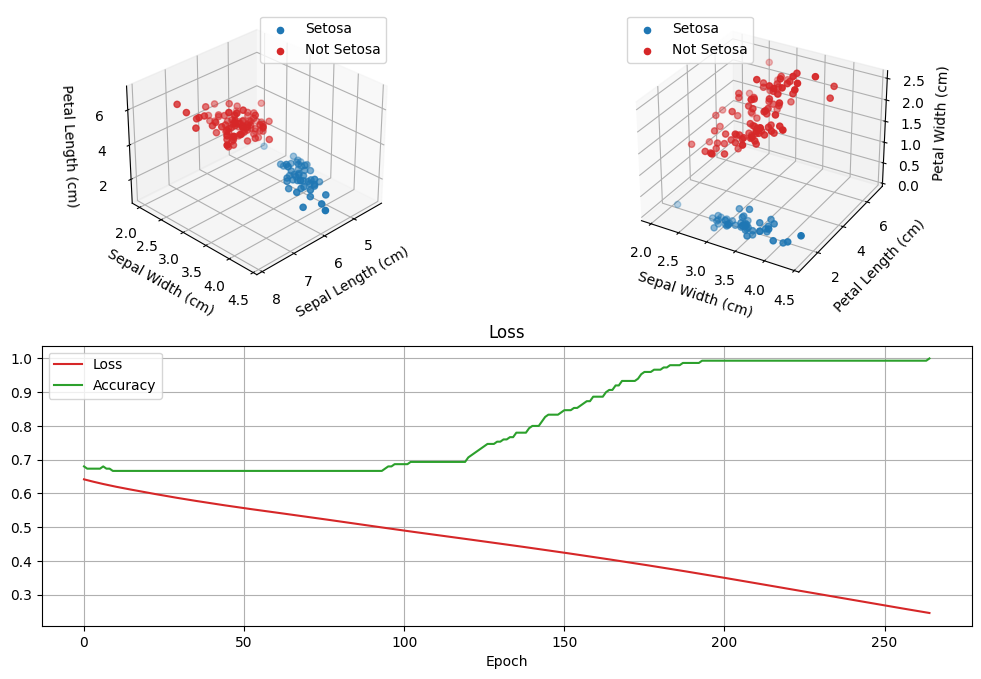

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

#----------------------------------------------------#

# Data

# Load the iris dataset
iris = datasets.load_iris()

# Sepal Length, Sepal Width, Petal Length and Petal Width
X = iris.data

# Setosa (0), Versicolour (1), and Virginica (2)
y = iris.target

# To change this problem to binary classification (2 classes), let's
# change the problem to classifying Setosa (0) and NOT Setosa (1) by changing all 2s to 1
y = [1 if y_i == 2 else y_i for y_i in y]

#----------------------------------------------------#

# Create an MLP with 3 neurons in the first hidden layer and 2 neurons in the second hidden layer
model = MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=1, warm_start=True, alpha=0.05)

accuracy_history = []

# Train the model for 8000 epochs or when accuracy reaches 100%
for epoch in range(8000):
  model.fit(X, y)
  accuracy = model.score(X, y)
  accuracy_history.append(accuracy)
  if (accuracy == 1):
    break

#----------------------------------------------------#

# Plotting

# Separate data by class for 3D plots
classes1 = {0: [], 1: []}
classes2 = {0: [], 1: []}
for x_i, y_i in zip(X, y):
  classes1[y_i].append(x_i[:3])
  classes2[y_i].append(x_i[1:])

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2)

# 3D Dataset (Sepal Length X Sepal Width X Petal Length)
ax1 = fig.add_subplot(gs[0, 0], projection='3d')

ax1.scatter(*np.array(classes1[0]).T, color='tab:blue', label='Setosa')
ax1.scatter(*np.array(classes1[1]).T, color='tab:red', label='Not Setosa')

ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_zlabel('Petal Length (cm)')
ax1.view_init(elev=30, azim=45)
ax1.legend()

# 3D Dataset (Sepal Width X Petal Length X Petal Width)
ax2 = fig.add_subplot(gs[0, 1], projection='3d')

ax2.scatter(*np.array(classes2[0]).T, color='tab:blue', label='Setosa')
ax2.scatter(*np.array(classes2[1]).T, color='tab:red', label='Not Setosa')

ax2.set_xlabel('Sepal Width (cm)')
ax2.set_ylabel('Petal Length (cm)')
ax2.set_zlabel('Petal Width (cm)')
ax2.legend()

# Loss and Accuracy plot over epochs
ax3 = fig.add_subplot(gs[1, :])

ax3.plot(model.loss_curve_, label='Loss', color='tab:red')
ax3.plot(accuracy_history, label='Accuracy', color='tab:green')

ax3.set_title('Loss')
ax3.set_xlabel('Epoch')
ax3.grid()
ax3.legend()

# Display the plot
plt.show()

### **MNIST Dataset - sklearn**

The Modified National Institute of Standards and Technology (MNIST) dataset consists of 70,000 images of hand-drawn digits, 0-9.
<br>
60,000 of the images are for *training*, 10,000 are for *testing*.

The image sizes are 28x28 pixels in size and colored in grayscale. This means each pixel takes a single value [0, 255], where 0 is black and 255 is white.

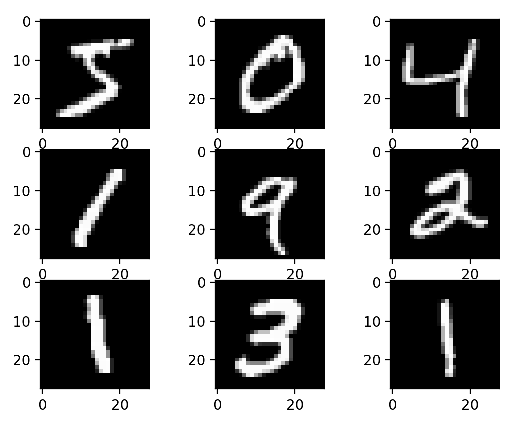

In the code below, the training and testing datasets are cut down to save on runtime, however, you can adjust them to your content.

In addition, rather than training the model on 10 classes, the problem is changed to binary classification by setting all numbers [0, 4] as class $0$ and all number [5, 9] as class $1$.

In [ ]:
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import cv2

#----------------------------------------------------#

# Data

# Load the dataset into training and testing sets
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Cut training set to 20000 samples and testing set to 4000 samples
# Lower samples = faster runtime, lower accuracy
# Higher samples = slower runtime, higher accuracy
train_X = train_X[:60000]
train_y = train_y[:60000]
test_X = test_X[:4000]
test_y = test_y[:4000]

# Image in 28x28 array of grayscale values for each pixel
#grayscale_img = cv2.cvtColor(train_X[0], cv2.COLOR_BGR2GRAY)

# Plot image in dataset
#plt.imshow(train_X[0], cmap='gray')

# Flatten 28x28 array of pixel values into 1D array to use as inputs
# 28x28 array of pixels --> 784 flat array of pixels
train_X = train_X.reshape((len(train_X), -1))
test_X = test_X.reshape((len(test_X), -1))

# Turn into binary classification ([0, 4] = 0, [5, 9] = 1)
train_y = [0 if y_i < 5 else 1 for y_i in train_y]
test_y = [0 if y_i < 5 else 1 for y_i in test_y]

#----------------------------------------------------#

# Create an MLP with 512 neurons in the 1st hidden layer, 128 in the 2nd, 32 in the 3rd, and 16 in the 4th
model = MLPClassifier(hidden_layer_sizes=(512, 128, 32, 16), max_iter=8000)

model.fit(train_X, train_y)

#----------------------------------------------------#

# Plotting

fig, ax = plt.subplots()

ax.plot(model.loss_curve_)
ax.set_title('Loss')
ax.set_xlabel('Epoch')

# Testing
accuracy = model.score(test_X, test_y)
print(f"Accuracy: {accuracy*100}%")

11490434/11490434 [==============================] - 0s 0us/step


### **Activity - Test the Model on Your Handwriting**

Now that you've trained a model on the MNIST dataset, you can test your model on your own handwriting!

1. Open Microsoft Paint or another drawing software
2. Shrink the canvas size to 28x28px

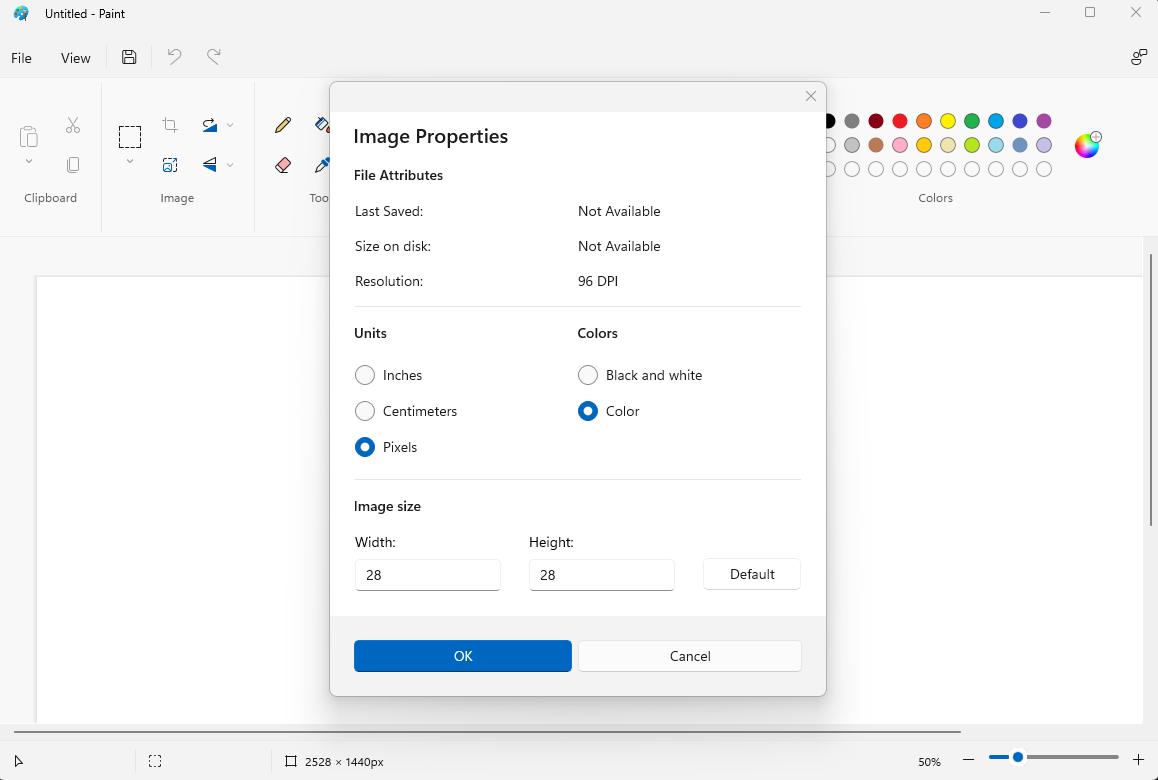

3. Fill the canvas background black

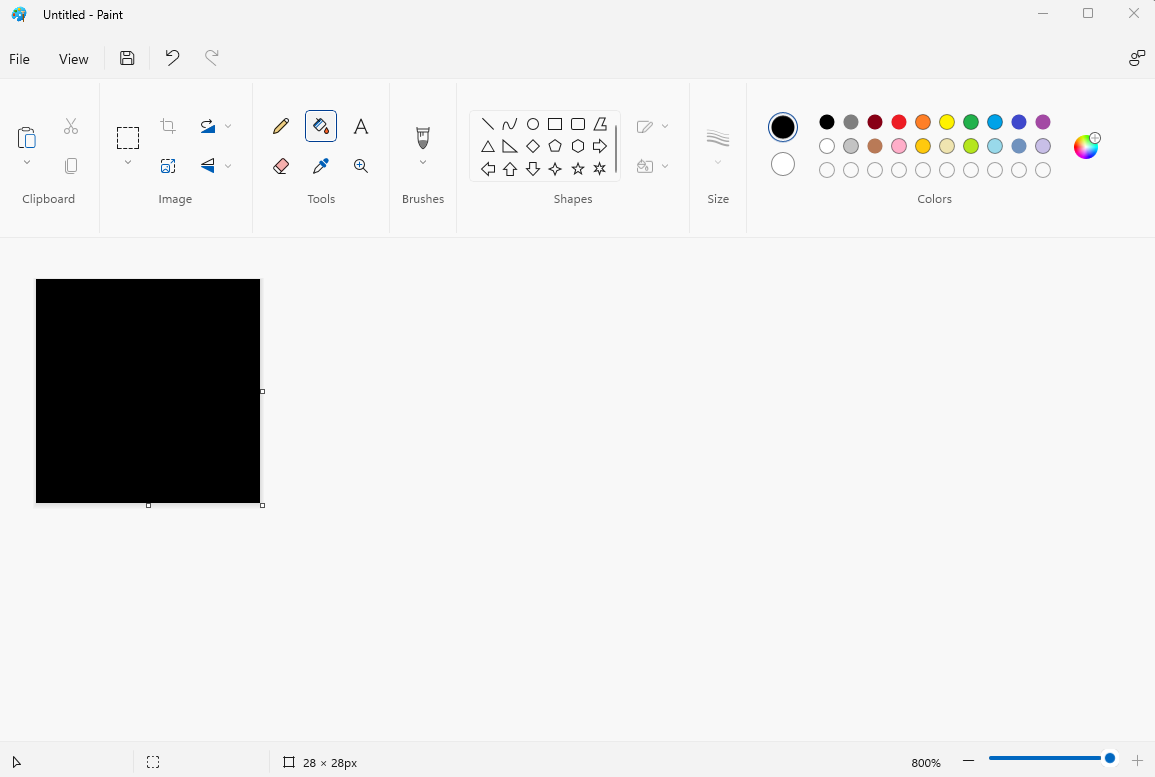

4. Using a white brush (~2-3px size), write a digit 0-9 on the black background (use Ctrl + Plus/Minus on the numpad to adjust brush size)

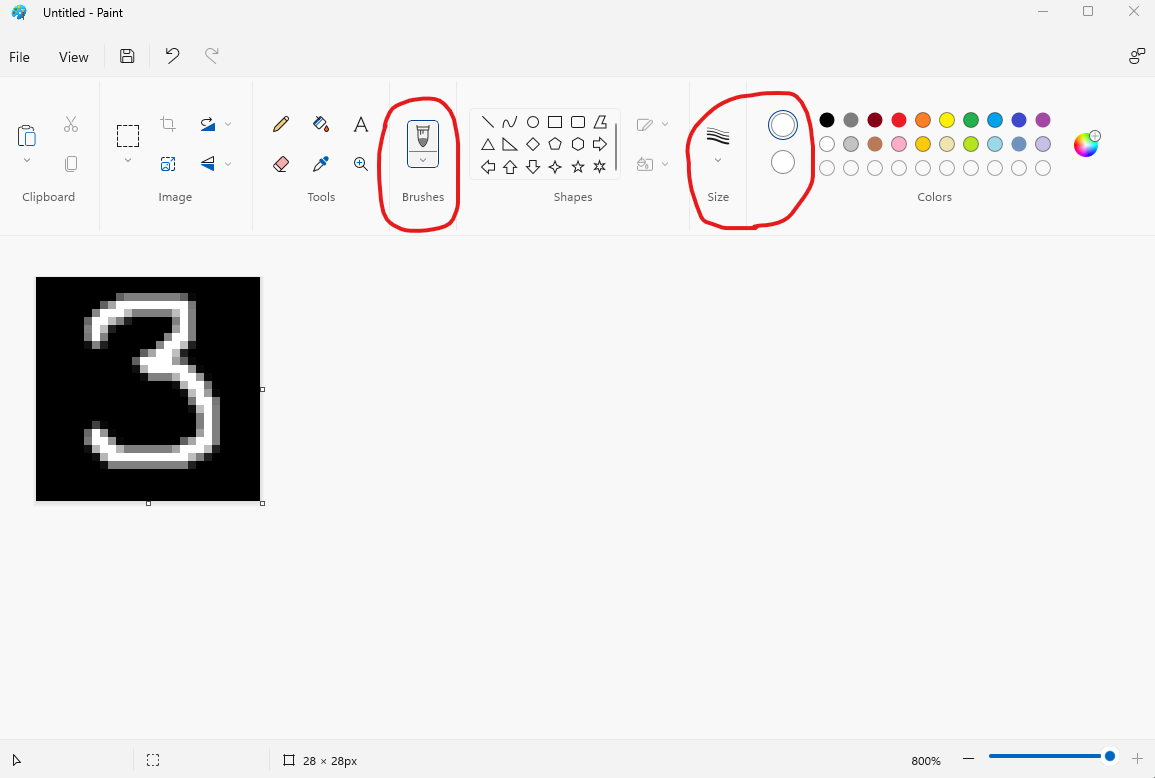

5. Save the image (0.jpg, 1.jpg, etc.)

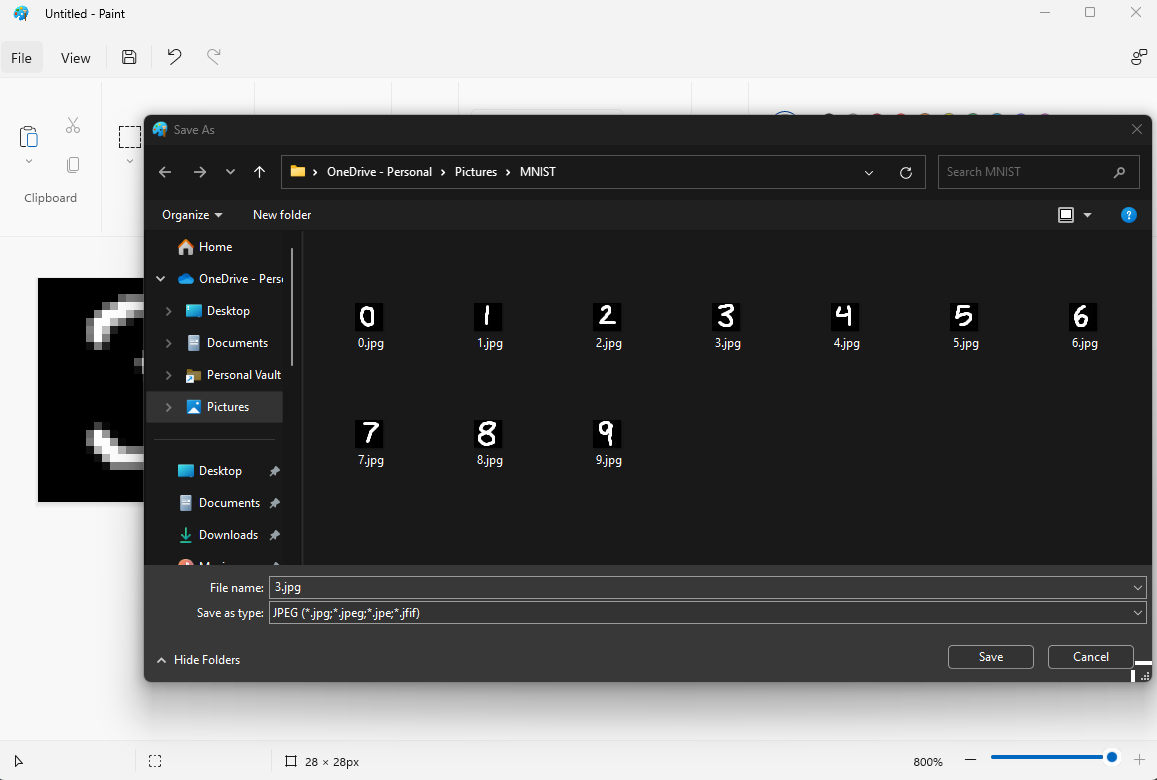

6. Upload the image(s) to Google Drive or to the Colab files

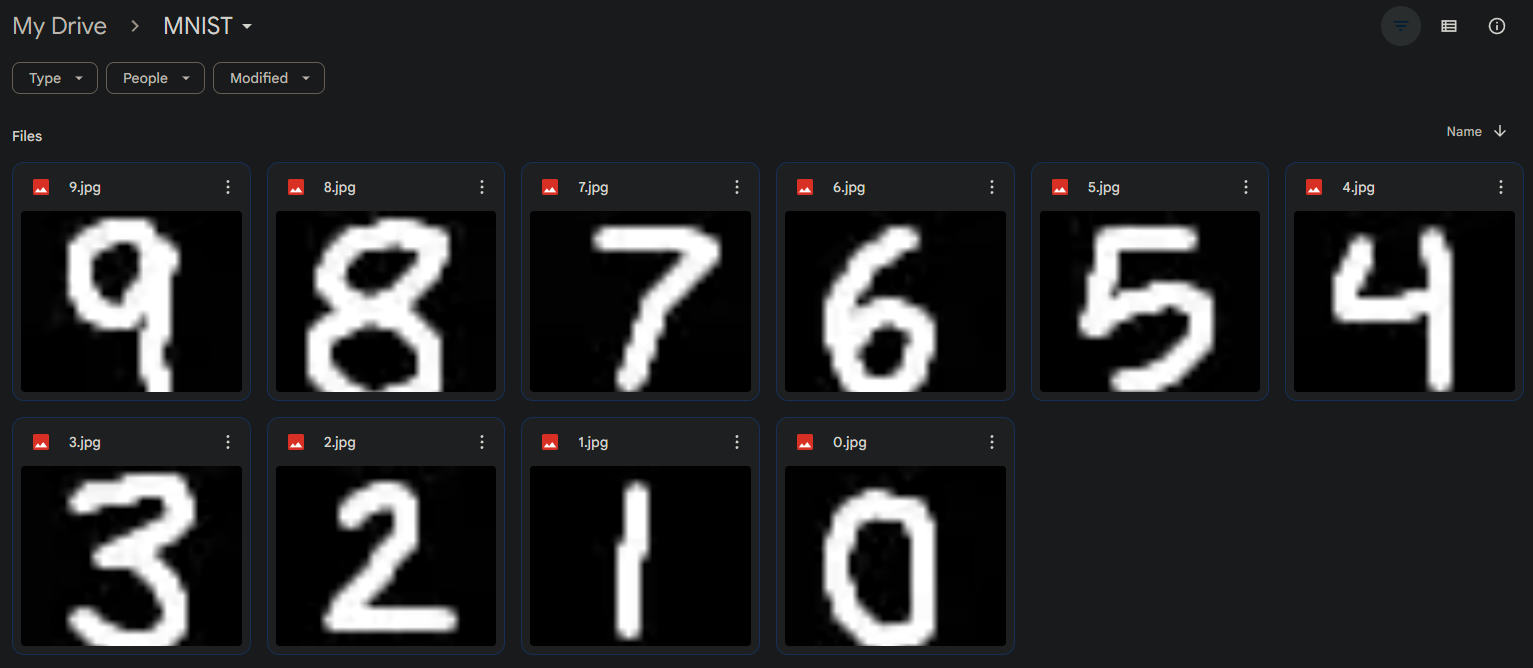

7. Mount your Google Drive to the colab session. In the "Files" tab, click the "Mount Drive" button.

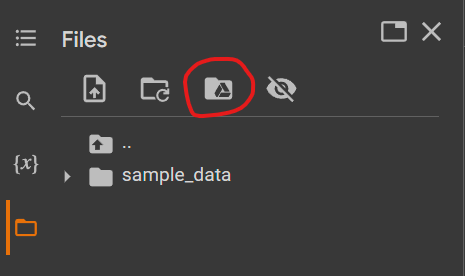

8. Replace the path in the line ```img = cv2.imread(f".../{i}.jpg")``` with the path of your image(s)
  * Open "Files" in Colab, locate your image, right-click it and select "Copy path"
  * If your files aren't named in the format 0.jpg, 1.jpg, etc., change {i}.jpg to represent your naming scheme

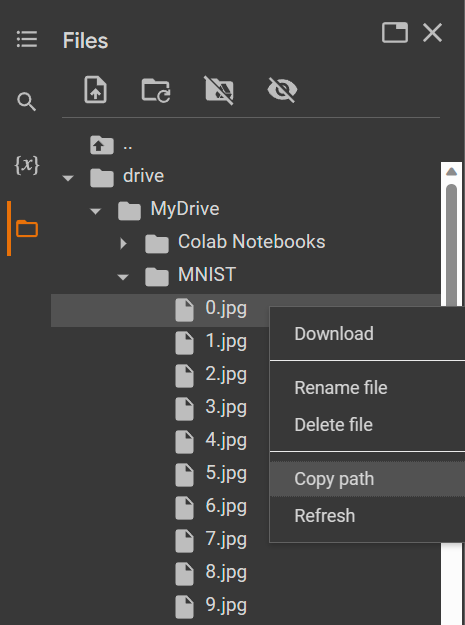

9. Run the code below to see your model's prediction on the numbers your wrote!

In [ ]:
# MNIST Hand-drawn Test
import cv2

accuracy = []

for i in range(10):
  # Convert drawn image to grayscale
  img = cv2.imread(f"/content/drive/MyDrive/MNIST/{i}.jpg")
  grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  grayscale_img = np.array(grayscale_img).flatten()

  # Predict with trained model
  pred = model.predict(grayscale_img.reshape(1, -1))

  # Store accuracy history
  if (pred == 0 and i < 5):
    accuracy.append(1)
  elif (pred == 1 and i >= 5):
    accuracy.append(1)
  else:
    accuracy.append(0)

  # Model's class prediction for each number
  print(f"{i} Drawing Prediction: {pred[0]}")

# Overall % accuracy
print(f"\nAccuracy: {100*np.mean(accuracy)}%")